# Identify Data

Found On: Kaggle

Source/Institution: US Census Bureau 

Data Set Name: 2013 American Community Survey

Data Provided: 4 CSV files with 3M+ lines of data and 70+ columns

Data Set Description: The American Community Survey is an ongoing survey from the US Census Bureau. In this survey, approximately 3.5 million households per year are asked detailed questions about who they are and how they live. Many topics are covered, including ancestry, education, work, transportation, internet use, and residence.

# Cleaned the Data

From the 4 data files:
1. Determined which columns where needed
2. Dropped unwanted columns
3. Merged the 4 DF into a singular data frame

# Refined the Data for Machine Learning

In [1]:
# import dependancies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
pd.options.display.max_columns = None


In [2]:
data = pd.read_csv("final_project_data_raw.csv")
data.head()

,Unnamed: 0,SERIALNO,state,lot_size,num_kids,work_status,fam_type_employment_status,family_income,household_with_gp,property_taxes,mortgage_status,num_marriages,race,age,education,job_type,marital_status
0,0,84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19,19.0,NaN,5
1,1,154,1,1.0,0.0,1.0,1.0,151000.0,0.0,3.0,3.0,1.0,2,55,20.0,4700.0,1
2,2,154,1,1.0,0.0,1.0,1.0,151000.0,0.0,3.0,3.0,1.0,2,56,16.0,7240.0,1
3,3,154,1,1.0,0.0,1.0,1.0,151000.0,0.0,3.0,3.0,NaN,2,21,19.0,NaN,5
4,4,154,1,1.0,0.0,1.0,1.0,151000.0,0.0,3.0,3.0,NaN,2,21,19.0,NaN,5


In [3]:
# drop unneeded columns
data = data.drop(columns = ["Unnamed: 0", "SERIALNO", "num_marriages", "state", "job_type", 'fam_type_employment_status', 'work_status'])

In [4]:
data = data.loc[data["age"] > 16]

In [5]:
# replace marital status 
data["marital_status"].replace({1:0, 2:0, 3:1, 4: 1, 5:2}, inplace=True)
data.head()

,lot_size,num_kids,family_income,household_with_gp,property_taxes,mortgage_status,race,age,education,marital_status
0,NaN,NaN,NaN,NaN,NaN,NaN,1,19,19.0,2
1,1.0,0.0,151000.0,0.0,3.0,3.0,2,55,20.0,0
2,1.0,0.0,151000.0,0.0,3.0,3.0,2,56,16.0,0
3,1.0,0.0,151000.0,0.0,3.0,3.0,2,21,19.0,2
4,1.0,0.0,151000.0,0.0,3.0,3.0,2,21,19.0,2


In [6]:
# lot_size
data['lot_size'] = data['lot_size'].fillna(0).replace({0 : "N/A", 
  1: ">1_acre", 
  2: '>10_acre', 
  3: '10+acres'})

In [7]:
# household_with_gp
data["household_with_gp"] = data["household_with_gp"].replace({
  0: "HH without grandparent",
  1: "HH with grandparent"})

In [8]:
# race
data['race'] = data['race'].replace({1: 'White',
                                                               2: "Black / African American",
                                                               3: 'American Indian',
                                                               4: 'Alaska Native',
                                                               5: "American Indian and Alaska Native",
                                                               6: "Asian",
                                                               7: "Native Hawaiian",
                                                               8: "Some Other Race",
                                                               9: "Two or More"
                                                               })

In [9]:
# education 
data.loc[data.education<15, 'education']= '<12th Grade'
data['education'] = data['education'].replace({15: '12th grade - No Diploma', 
                                               16: "High School Diploma", 
                                               17: 'GED',
                                               18: 'Less Than 1 Year of College', 
                                                19: "Some College - No Degree",
                                                20: "Associate's", 
                                                21: "Bachelor's", 
                                                22: "Master's",
                                                23: "Professional Degree Beyond a Bachelor's", 
                                                24: 'Doctorate Degree',
                                                               })


In [10]:
# mortgage_status
data['mortgage_status'] = data['mortgage_status'].replace({
           1 :"Mortgage, deed of trust, or similar debt",
           2 :"Contract to purchase",
           3 :"None"})

In [11]:
# property_taxes 
data['property_taxes'] = data['property_taxes'].replace({
            1 : "$0",
           2 : "$ 1 - $  49",
           3 :"$ 50 - $  99",
           4 :"$ 100 - $ 149",
           5 :"$ 150 - $ 199",
           6 :"$ 200 - $ 249",
           7 :"$ 250 - $ 299",
           8 :"$ 300 - $ 349",
           9 :"$ 350 - $ 399",
           10: "$ 400 - $ 449",
           11: "$ 450 - $ 499",
           12 :"$ 500 - $ 549",
           13 :"$ 550 - $ 599",
           14 :"$ 600 - $ 649",
           15 :"$ 650 - $ 699",
           16 :"$ 700 - $ 749",
           17 :"$ 750 - $ 799",
           18 :"$ 800 - $ 849",
           19 :"$ 850 - $ 899",
           20 :"$ 900 - $ 949",
           21 :"$ 950 - $ 999",
           22 :"$1000 - $1099",
           23 :"$1100 - $1199",
           24 :"$1200 - $1299",
           25 :"$1300 - $1399",
           26 :"$1400 - $1499",
           27 :"$1500 - $1599",
           28 :"$1600 - $1699",
           29 :"$1700 - $1799",
           30 :"$1800 - $1899",
           31 :"$1900 - $1999",
           32 :"$2000 - $2099",
           33 :"$2100 - $2199",
           34 :"$2200 - $2299",
           35 :"$2300 - $2399",
           36 :"$2400 - $2499",
           37 :"$2500 - $2599",
           38 :"$2600 - $2699",
           39 :"$2700 - $2799",
           40 :"$2800 - $2899",
           41 :"$2900 - $2999",
           42 :"$3000 - $3099",
           43 :"$3100 - $3199",
           44 :"$3200 - $3299",
           45 :"$3300 - $3399",
           46 :"$3400 - $3499",
           47 :'$3500 - $3599',
           48 :'$3600 - $3699',
           49 :"$3700 - $3799",
           50 :"$3800 - $3899",
           51 :"$3900 - $3999",
           52 :"$4000 - $4099",
           53 :"$4100 - $4199",
           54 :"$4200 - $4299",
           55 :"$4300 - $4399",
           56 :"$4400 - $4499",
           57 :"$4500 - $4599 ",
           58 :"$4600 - $4699",
           59 :"$4700 - $4799",
           60 :"$4800 - $4899",
           61 :"$4900 - $4999",
           62 :"$5000 - $5499",
           63 :"$5500 - $5999",
           64 :"$6000 - $6999",
           65 :"$7000 - $7999",
           66 :"$8000 - $8999",
           67 :"$9000 - $9999",
           68 :"$10000+ "})

In [12]:
data = data.dropna()
data.head()

,lot_size,num_kids,family_income,household_with_gp,property_taxes,mortgage_status,race,age,education,marital_status
1,>1_acre,0.0,151000.0,HH without grandparent,$ 50 - $ 99,None,Black / African American,55,Associate's,0
2,>1_acre,0.0,151000.0,HH without grandparent,$ 50 - $ 99,None,Black / African American,56,High School Diploma,0
3,>1_acre,0.0,151000.0,HH without grandparent,$ 50 - $ 99,None,Black / African American,21,Some College - No Degree,2
4,>1_acre,0.0,151000.0,HH without grandparent,$ 50 - $ 99,None,Black / African American,21,Some College - No Degree,2
11,>1_acre,0.0,136000.0,HH without grandparent,$1400 - $1499,"Mortgage, deed of trust, or similar debt",White,59,High School Diploma,0


# Explored the Data with Tableau
See Tableau

In [13]:
data.to_csv('tableau_data.csv')

# Data Pre-Processing

In [14]:
categorical_columns = ['lot_size', 'household_with_gp', 'property_taxes', 'mortgage_status', 'race', 'education']
numerical_columns = ['num_kids', 'family_income', 'age']

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
ohe.fit_transform(data[categorical_columns])

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [16]:
data_oh = pd.merge(data[numerical_columns].reset_index(), 
                   pd.DataFrame(ohe.transform(data[categorical_columns])), 
                   left_index = True, right_index = True)

In [17]:
data_oh = data_oh.drop(columns = ['index'])

# Create Learning Model

In [18]:
# Predetermined test vs train (most likely 75/25); random_state=1 makes the code reduceable
X_train, X_test, y_train, y_test = train_test_split(data_oh, data['marital_status'], random_state=1)

In [19]:
# StandardScaler removes the mean and scales each feature/variable to unit variance. 
# This operation is performed feature-wise in an independent way. 
# StandardScaler can be influenced by outliers (if they exist in the dataset) since it 
# involves the estimation of the empirical mean and standard deviation of each feature.
X_scaler = StandardScaler().fit(X_train)

In [20]:
# Transform keeps the test data from the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# one hot encoding translates the data to 0 False and 1 True
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [22]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=100))
model.add(Dense(units=100, activation='relu'))

# needs 1 unit per column in one hot enconding
model.add(Dense(units=3, activation='softmax'))

In [23]:
# what does this tell us?
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 20,503
Trainable params: 20,503
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
23291/23291 - 29s - loss: 0.3996 - accuracy: 0.8681
Epoch 2/30
23291/23291 - 26s - loss: 0.3846 - accuracy: 0.8717
Epoch 3/30
23291/23291 - 28s - loss: 0.3817 - accuracy: 0.8720
Epoch 4/30
23291/23291 - 26s - loss: 0.3800 - accuracy: 0.8726
Epoch 5/30
23291/23291 - 28s - loss: 0.3790 - accuracy: 0.8729
Epoch 6/30
23291/23291 - 31s - loss: 0.3781 - accuracy: 0.8730
Epoch 7/30
23291/23291 - 27s - loss: 0.3772 - accuracy: 0.8730
Epoch 8/30
23291/23291 - 29s - loss: 0.3767 - accuracy: 0.8734
Epoch 9/30
23291/23291 - 25s - loss: 0.3763 - accuracy: 0.8734
Epoch 10/30
23291/23291 - 26s - loss: 0.3758 - accuracy: 0.8736
Epoch 11/30
23291/23291 - 27s - loss: 0.3754 - accuracy: 0.8737
Epoch 12/30
23291/23291 - 28s - loss: 0.3752 - accuracy: 0.8739
Epoch 13/30
23291/23291 - 24s - loss: 0.3750 - accuracy: 0.8739
Epoch 14/30
23291/23291 - 26s - loss: 0.3747 - accuracy: 0.8738
Epoch 15/30
23291/23291 - 26s - loss: 0.3744 - accuracy: 0.8740
Epoch 16/30
23291/23291 - 24s - loss: 0.3743 - ac

# Quantified Trained Model  & Prediction
See Testing.ipynb

In [26]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7764/7764 - 7s - loss: 0.3819 - accuracy: 0.8726
Normal Neural Network - Loss: 0.38190603256225586, Accuracy: 0.87262362241745


In [27]:
model.save("model_saved.h5")

In [28]:
data_oh.sample(2000).to_csv("sample_data.csv", index=False)

# Explored Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf = RandomForestClassifier()
clf = clf.fit(X_train_scaled, y_train)

In [31]:
clf.score(X_test_scaled, y_test)

0.8670930658476796

In [32]:
from sklearn import tree
import os

In [33]:
importances = clf.feature_importances_ 
importances

array([3.43229807e-02, 2.00755901e-01, 5.05692005e-01, 2.04828455e-03,
       4.08083553e-03, 5.02757445e-03, 2.81491354e-03, 4.51053494e-03,
       4.25551661e-03, 1.85271921e-03, 2.00516302e-03, 1.86522571e-03,
       2.14661943e-03, 1.87514923e-03, 2.59170272e-03, 2.16852049e-03,
       2.61370609e-03, 2.05021850e-03, 1.75805043e-03, 2.98684184e-03,
       1.87345100e-03, 3.27393418e-03, 2.06991687e-03, 2.89952398e-03,
       1.87807169e-03, 3.39804015e-03, 1.89312444e-03, 2.85544275e-03,
       1.74655947e-03, 4.38008357e-03, 3.91770177e-03, 2.94270575e-03,
       2.73516017e-03, 4.72187073e-03, 3.28868219e-03, 3.02468362e-03,
       3.88842356e-03, 3.05092766e-03, 2.59479677e-03, 3.27804811e-03,
       2.06588354e-03, 4.49045988e-03, 1.76789827e-03, 2.36134400e-03,
       2.03852098e-03, 2.51468664e-03, 3.33490491e-03, 1.90406643e-03,
       1.60460617e-03, 1.99016633e-03, 1.11183690e-03, 3.99064987e-03,
       9.77021509e-04, 1.87678431e-03, 1.17846646e-03, 1.34736159e-03,
      

In [34]:
feature_names = data.columns
feature_names

Index(['lot_size', 'num_kids', 'family_income', 'household_with_gp',
       'property_taxes', 'mortgage_status', 'race', 'age', 'education',
       'marital_status'],
      dtype='object')

In [35]:
forest_features = sorted(zip(clf.feature_importances_, feature_names), reverse=True)
forest_features

[(0.5056920049545199, 'family_income'),
 (0.20075590146170347, 'num_kids'),
 (0.03432298070303187, 'lot_size'),
 (0.005027574447354028, 'mortgage_status'),
 (0.004510534941454965, 'age'),
 (0.004255516609063531, 'education'),
 (0.0040808355293062756, 'property_taxes'),
 (0.002814913543705171, 'race'),
 (0.0020482845487667756, 'household_with_gp'),
 (0.0018527192138117347, 'marital_status')]

In [36]:
# The loss is calculated on training and validation and its interpretation is based on how well the model is doing in these two sets. It is the sum of errors made for each example in training or validation sets. Loss value implies how poorly or well a model behaves after each iteration of optimization.
model.evaluate(X_test_scaled, y_test_categorical)

7764/7764 [==============================] - 7s 919us/step - loss: 0.3819 - accuracy: 0.8726


[0.38190603256225586, 0.87262362241745]

# Matplotlib
Using matplotlib, created a bar chart showing the Random Forest results

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pandas import DataFrame

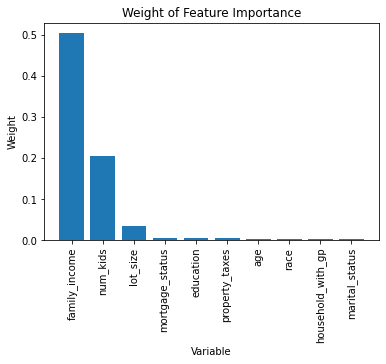

In [38]:
variable = ['family_income','num_kids','lot_size','mortgage_status','education', 'property_taxes', 'age', 'race', 'household_with_gp', 'marital_status']
weight = [0.504141, 0.204110, 0.033382, 0.004979, 0.004791, 0.004090, 0.003873, 0.002807, 0.002038, 0.001794]

plt.bar(variable, weight)
plt.title('Weight of Feature Importance')
plt.xlabel('Variable')
plt.ylabel('Weight')

# Label the tick marks according to the index values in the 'counts' series
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)


plt.show()

# Hosted on Colab
See link HERE: https://colab.research.google.com/drive/1knJRD_JSAHenPDdukYkd3eue3l3_0XP2?usp=sharing&pli=1&authuser=1